In [1]:
import os
import numpy as np
import pandas as pd
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

NUM_FULLY_COVERED = 1451
NUM_NOT_COVERED = 3664
NUM_NOT_FACE = 1114
NUM_PARTIALLY_COVERED = 392
NUM_OF_EACH_LABEL = [NUM_FULLY_COVERED, NUM_NOT_COVERED, NUM_NOT_FACE, NUM_PARTIALLY_COVERED]

LABELS = ["Fully covered", "Not covered", "Not face", "Partially covered"]

# Checks if feature data has been created locally
# if not os.path.exists("mask_data.csv"):
#     import featurize
    
data = np.array(pd.read_csv('mask_data.csv', sep=',',header=None))
X, Y = np.split(data, [-1], axis=1)
Y = Y.flatten()

scaler = StandardScaler()
X = scaler.fit_transform(X)

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)


In [2]:
X.shape

(6621, 4096)

In [3]:
import numpy as np
import matplotlib.pyplot as plt

from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from tensorflow.keras.applications import DenseNet121
from keras.preprocessing.image import ImageDataGenerator

from sklearn.model_selection import train_test_split

In [4]:
x_train = x_train.reshape(-1,64,64,1)
x_test = x_test.reshape(-1,64,64,1)

# Split the training data into training and val datasets
x_train, x_val, y_train, y_val = train_test_split(
	x_train, y_train, test_size = 1/6)

# Print the dataset sizes
print('x_train.shape =', x_train.shape)
print('y_train.shape =', y_train.shape)
print('x_val.shape =', x_val.shape)
print('y_val.shape =', y_val.shape)
print('x_test.shape =', x_test.shape)
print('y_test.shape =', y_test.shape)


x_train.shape = (4413, 64, 64, 1)
y_train.shape = (4413,)
x_val.shape = (883, 64, 64, 1)
y_val.shape = (883,)
x_test.shape = (1325, 64, 64, 1)
y_test.shape = (1325,)


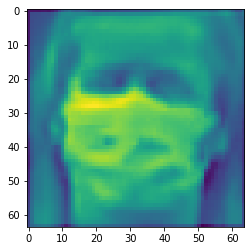

In [5]:
plt.imshow(x_train[2915][:,:,0])
plt.show()

In [6]:
# Define a function to generate and complie the ConvNet
def make_conv_model():
    model = Sequential()
    
    model.add(Conv2D(filters = 10, kernel_size = (4,4),padding = 'Same', 
                activation ='relu', input_shape = (64,64,1)))
    model.add(Conv2D(filters = 10, kernel_size = (4,4),padding = 'Same', 
                activation ='relu'))
    model.add(MaxPool2D(pool_size=(2,2)))
    model.add(Flatten())
    model.add(Dense(64, activation = "relu"))
    # solve overfitting 
    model.add(Dropout(0.2))
    model.add(Dense(4, activation = "softmax"))
    
    model.compile(optimizer=keras.optimizers.Adam(),
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'] ) 
    
    model.summary()
    return model

# Define the parameters for training the models
epochs = 30
batch_size = 128

In [7]:
simple_conv_model = make_conv_model()
simple_conv_history = simple_conv_model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_val, y_val), verbose=1)
simple_conv_test_loss, simple_conv_test_acc = simple_conv_model.evaluate(x_test, y_test)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 10)        170       
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 10)        1610      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 10)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 10240)             0         
                                                                 
 dense (Dense)               (None, 64)                655424    
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                        

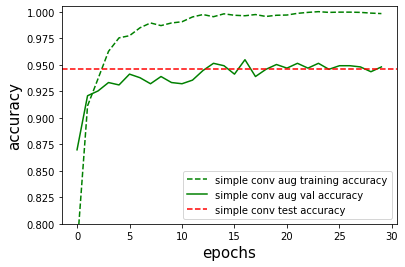

In [8]:
plt.plot(simple_conv_history.history["accuracy"], "g--",label="simple conv aug training accuracy")
plt.plot(simple_conv_history.history["val_accuracy"], "g-",label="simple conv aug val accuracy")
#plt.axhline(simple_conv_aug_test_acc,color="k", linestyle="--", label="simple conv aug test accuracy")
plt.axhline(simple_conv_test_acc,color="r", linestyle="--", label="simple conv test accuracy")
plt.xlabel("epochs", fontsize=15)
plt.ylabel("accuracy", fontsize=15)
plt.ylim(0.80, 1.005)
plt.legend()
plt.show()

In [10]:
# predictions for x_test
predicted_classes = simple_conv_model.predict(x_test)
predicted_classes = np.argmax(np.round(predicted_classes),axis=1)

In [13]:
len(y_test)

1325

Found 1253 correct labels


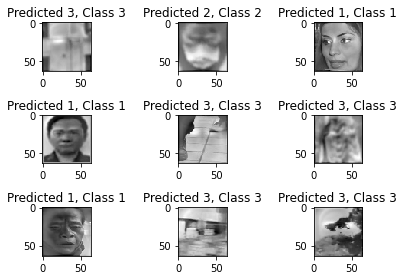

In [12]:
correct = np.where(predicted_classes==y_test)[0]
print ("Found %d correct labels" % len(correct))
for i, correct in enumerate(correct[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(x_test[correct].reshape(64,64), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[correct], y_test[correct]))
    plt.tight_layout()